In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [4]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [43]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
      images = []
      labels = []
      reader = csv.reader(training_file, delimiter =",")
      
      next(reader,None)
      
      for row in reader:
        label = row[0]
        data = row[1:785]
        image = np.array(data).reshape((28,28))
        
        labels.append(label)
        images.append(image)

      images = np.array(images).astype(float)
      labels = np.array(labels).astype(float)
      # Your code ends here
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [44]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis = -1)# Your Code Here
testing_images = np.expand_dims(testing_images, axis = -1)# Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
    rescale= 1/255,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = "nearest",
    rotation_range = 40,
    shear_range =0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range =0.2
    )

validation_datagen = ImageDataGenerator(
    # Your Code Here)
    rescale = 1/255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [50]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    tf.keras.layers.Conv2D(32, 5, input_shape = (28,28,1), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, 5, activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dense(25, activation = "softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 25)               

In [56]:
# Compile Model. 
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])# Your Code Here)

train_gen = train_datagen.flow(
    training_images,
    training_labels,
    batch_size =64
)

val_gen = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size =64
)

# Train the Model
history = model.fit(train_gen,
                    epochs = 10, 
                    batch_size = 32,
                    validation_data = val_gen,
                    verbose = 1)# Your Code Here)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]

Epoch 1/10
429/429 [==============================] - 34s 80ms/step - loss: 2.7892 - accuracy: 0.1380 - val_loss: 2.2241 - val_accuracy: 0.2878
Epoch 2/10
429/429 [==============================] - 35s 80ms/step - loss: 2.2479 - accuracy: 0.2885 - val_loss: 1.7974 - val_accuracy: 0.3724
Epoch 3/10
429/429 [==============================] - 34s 80ms/step - loss: 1.9447 - accuracy: 0.3744 - val_loss: 1.3800 - val_accuracy: 0.5231
Epoch 4/10
429/429 [==============================] - 35s 81ms/step - loss: 1.6887 - accuracy: 0.4479 - val_loss: 1.1973 - val_accuracy: 0.5895
Epoch 5/10
429/429 [==============================] - 35s 81ms/step - loss: 1.5314 - accuracy: 0.5016 - val_loss: 0.8951 - val_accuracy: 0.6584
Epoch 6/10
429/429 [==============================] - 34s 80ms/step - loss: 1.3645 - accuracy: 0.5486 - val_loss: 0.8851 - val_accuracy: 0.6768
Epoch 7/10
429/429 [==============================] - 34s 80ms/step - loss: 1.2443 - accuracy: 0.5865 - val_loss: 0.8110 - val_accuracy:

[6.92426086682151, 0.56609035]

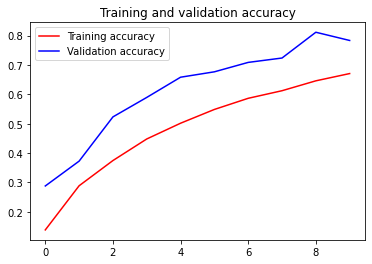

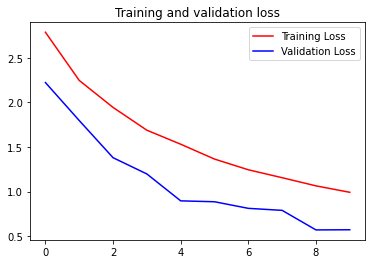

In [61]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history["accuracy"]# Your Code Here
val_acc = history.history["val_accuracy"]# Your Code Here
loss = history.history["loss"]# Your Code Here
val_loss = history.history["val_loss"]# Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()